<a href="https://colab.research.google.com/github/ninyx/PyTorch/blob/master/Pytorch_Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Colab for PyTorch

### Check available GPU

In [1]:
!nvidia-smi

Thu Apr 13 23:20:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Check GPU Access for PyTorch

In [7]:
import torch
import numpy as np

torch.cuda.is_available()

True

In [3]:
#Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Putting tensors and models in GPU

In [9]:
#Create tensor in CPU
tensor = torch.tensor([1,2,3])

#Check device of tensor
print(tensor, tensor.device)

#Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
print(tensor_on_gpu)

#Move it back to CPU
tensor_on_cpu = tensor_on_gpu.cpu().numpy()
print(tensor_on_cpu)

tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='cuda:0')
tensor([1, 2, 3])


# End-to-end PyTorch Workflow

In [1]:
to_be_covered = {1: 'data prep and load',
                 2: 'build model',
                 3: 'fitting/training model to data',
                 4: 'predict and eval model',
                 5: 'save and load model',
                 6: 'put all together'}

In [2]:
import torch
from torch import nn # torch neural networks (nn)
import matplotlib.pyplot as plt

print(torch.__version__)


2.0.0+cu118


### Data Prep and Loading

In [ ]:
#Create known data using linear regression to make a straight line with known parameters

#y = ax + b
weight = 0.7 #a 
bias = 0.3 #b

#build a model to estimate weight and bias
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

print(X[:20], y[:20], len(X), len(y))

In [7]:
#Splitting data (X) for training and test set
for_train = int(0.8 * len(X)) # using 80-20 ratio for training and datasets

Xtrain, ytrain = X[:for_train], y[:for_train]
Xtest, ytest = X[for_train:], y[for_train:]


In [8]:
#Build visualization func for dataset
def plt_predict(train_data = Xtrain,
                train_label = ytrain,
                test_data = Xtest,
                test_label = ytest,
                predictions = None):
  "Plot training data, test data and compare to predictions"
  plt.figure(figsize = (10,7))
  #Training data in blue
  plt.scatter(train_data, train_label, c = "b", s = 4, label = "Training data")

  #Test data in green
  plt.scatter(test_data, test_label, c = "g", s = 4, label = "Testing data")

  if predictions is not None:
    #plot predictions
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")
  
  plt.legend(prop = {"size": 14})




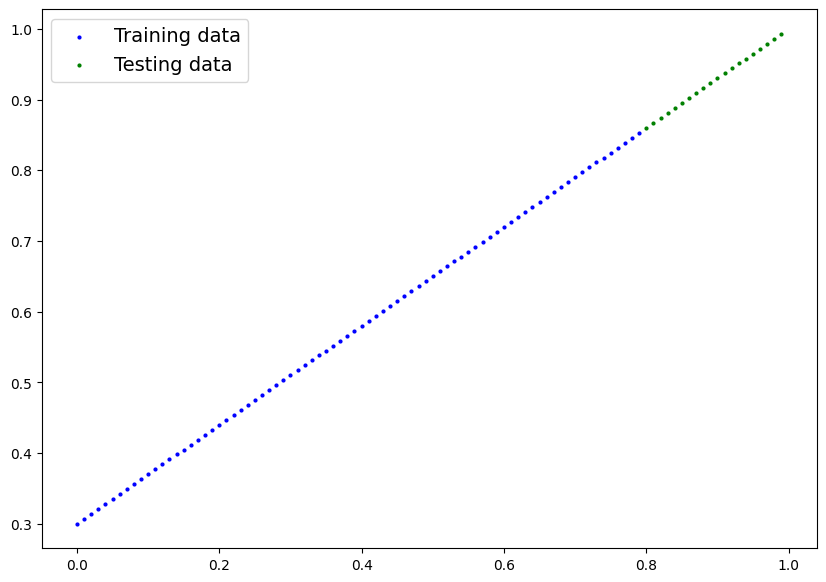

In [9]:
plt_predict()

### Creating Model to learn patterns in training data.

In [11]:
from torch import nn

#Creating a LR Model Regression Class
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float)) 
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float)) 
    
  def forward(self, x:torch.Tensor) -> torch.Tensor: #input data is x, returns torch.Tensor
    return self.weight*x + self.bias #linear regression formula
       